<a href="https://colab.research.google.com/github/arturnovais/pad-recomendacao2023/blob/pr/Recomenda%C3%A7%C3%A3ov1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ask a question**
#Será que é possível melhorar a experiência do usuário se soubermos suas experiências anteriores ?

#**Get the data**
#Faremos a seguir o upload do nosso data set de review de cervejas (obtido no site Kaggel, do usuário Sveen De Waard

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = io.BytesIO(uploaded['beer_review (2).csv'])

Saving beer_review.csv to beer_review (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv(data)
df.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


#**Explore the data**

In [ ]:
#Primeiro vamos obter uma visão geral dos dados para compreender como podemos
#trabalhar melhor com eles

df.describe()

,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
count,5558.000000,5558.000000,5558.00000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000
mean,2779.500000,64.449082,6.63373,3.760239,20.715545,38.452321,15.938647,42.746132,15.975171,34.316121,53.629723,34.610291,1.314142,39.378553,38.414538,17.584023,68.591400
std,1604.600729,35.814930,2.52166,0.442951,13.736873,22.184524,11.624254,28.589959,18.268342,27.118100,35.866101,39.850228,3.874110,36.652293,31.912843,23.973879,44.600385
min,1.000000,2.000000,0.00000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1390.250000,34.000000,5.00000,3.590000,10.000000,25.000000,8.000000,25.000000,5.000000,13.000000,27.000000,9.000000,0.000000,10.000000,14.000000,4.000000,33.000000
50%,2779.500000,64.000000,6.00000,3.820000,20.000000,35.000000,14.000000,38.000000,10.000000,29.000000,49.500000,21.000000,0.000000,28.000000,30.000000,9.000000,65.000000
75%,4168.750000,95.000000,7.90000,4.040000,25.000000,45.000000,22.000000,55.000000,20.000000,51.000000,74.000000,44.000000,1.000000,61.750000,56.000000,22.000000,99.000000
max,5558.000000,126.000000,57.50000,4.830000,65.000000,100.000000,83.000000,197.000000,139.000000,150.000000,263.000000,323.000000,66.000000,222.000000,193.000000,184.000000,304.000000


In [ ]:
df.columns

Index(['Name', 'key', 'Style', 'Style Key', 'Brewery', 'Description', 'ABV',
       'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
       'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices',
       'Malty'],
      dtype='object')

In [ ]:
#Primeiro vamos retirar algumas colunas que não serão úteis para nossa modelagem

dfnum = df.drop(['Name','Style','Brewery','Description'],axis=1)
dfnum

,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,8,5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,8,7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,8,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
3,254,8,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119
4,255,8,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,696,17,6.8,3.59,35,50,8,44,24,19,52,21,0,26,21,96,77
5554,697,17,6.9,3.79,35,50,22,73,9,58,87,23,0,48,91,44,104
5555,698,17,7.5,3.76,35,50,11,36,50,70,72,59,0,81,110,18,73
5556,699,17,8.0,3.61,35,50,6,64,30,57,78,15,1,28,57,23,129


In [ ]:
#Resumir as colunas Min IBU e Max IBU para uma só coluna
#que corresponderá à média

meanIBU = []

for i in range(5558):
  meanIBU.append((dfnum['Min IBU'].iloc[i]+dfnum['Max IBU'].iloc[i])/2)

dfnum['Mean IBU'] = meanIBU
dfnum = dfnum.drop(['Min IBU','Max IBU'], axis=1)
dfnum

,key,Style Key,ABV,Ave Rating,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,Mean IBU
0,251,8,5.3,3.65,13,32,9,47,74,33,0,33,57,8,111,37.5
1,252,8,7.2,3.90,12,57,18,33,55,16,0,24,35,12,84,37.5
2,253,8,5.0,3.58,14,37,6,42,43,11,0,10,54,4,62,37.5
3,254,8,8.5,4.15,13,55,31,47,101,18,1,49,40,16,119,37.5
4,255,8,5.3,3.67,21,69,10,63,120,14,0,19,36,15,218,37.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,696,17,6.8,3.59,8,44,24,19,52,21,0,26,21,96,77,42.5
5554,697,17,6.9,3.79,22,73,9,58,87,23,0,48,91,44,104,42.5
5555,698,17,7.5,3.76,11,36,50,70,72,59,0,81,110,18,73,42.5
5556,699,17,8.0,3.61,6,64,30,57,78,15,1,28,57,23,129,42.5


In [ ]:
#menor nota
print('Menor nota:', df['Sweet'].min())

#maior nota
print('Maior nota:', df['Sweet'].max())

Menor nota: 0
Maior nota: 263


In [ ]:
#Como podemos observar no exemplo acima, as últimas colunas são avaliadas
#a partir de uma escala arbitrária. Assim, para deixar com que todas fiquem
#de forma proporcional, vamos colocá-las em porcentagem baseando-se na maior e na
#menor nota de sua respectiva categoria

df1 = pd.DataFrame()

colunas = ['Astringency','Body','Alcohol','Bitter','Sweet','Sour','Salty','Fruits','Hoppy','Spices','Malty']

for coluna in colunas:

  lista = []
  max = dfnum[coluna].max()

  for i in range(5558):

    lista.append((100*dfnum[coluna].iloc[i])/max)

  lista = ['%.2f' % num for num in lista]
  df1[coluna+'%'] = lista

df1


,Astringency%,Body%,Alcohol%,Bitter%,Sweet%,Sour%,Salty%,Fruits%,Hoppy%,Spices%,Malty%
0,15.66,16.24,6.47,31.33,28.14,10.22,0.00,14.86,29.53,4.35,36.51
1,14.46,28.93,12.95,22.00,20.91,4.95,0.00,10.81,18.13,6.52,27.63
2,16.87,18.78,4.32,28.00,16.35,3.41,0.00,4.50,27.98,2.17,20.39
3,15.66,27.92,22.30,31.33,38.40,5.57,1.52,22.07,20.73,8.70,39.14
4,25.30,35.03,7.19,42.00,45.63,4.33,0.00,8.56,18.65,8.15,71.71
...,...,...,...,...,...,...,...,...,...,...,...
5553,9.64,22.34,17.27,12.67,19.77,6.50,0.00,11.71,10.88,52.17,25.33
5554,26.51,37.06,6.47,38.67,33.08,7.12,0.00,21.62,47.15,23.91,34.21
5555,13.25,18.27,35.97,46.67,27.38,18.27,0.00,36.49,56.99,9.78,24.01
5556,7.23,32.49,21.58,38.00,29.66,4.64,1.52,12.61,29.53,12.50,42.43


In [ ]:
#Além de padronizar as demais categorias, vamos aproveitar as colunas Style Key,
#ABV e Ave Rating em suas formas integras, pois elas auxiliarão no processo de
#agrupamento (mais para frente...)

df1['Style Key'] = dfnum['Style Key']
df1['ABV'] = dfnum['ABV']

df1

,Astringency%,Body%,Alcohol%,Bitter%,Sweet%,Sour%,Salty%,Fruits%,Hoppy%,Spices%,Malty%,Style Key,ABV
0,15.66,16.24,6.47,31.33,28.14,10.22,0.00,14.86,29.53,4.35,36.51,8,5.3
1,14.46,28.93,12.95,22.00,20.91,4.95,0.00,10.81,18.13,6.52,27.63,8,7.2
2,16.87,18.78,4.32,28.00,16.35,3.41,0.00,4.50,27.98,2.17,20.39,8,5.0
3,15.66,27.92,22.30,31.33,38.40,5.57,1.52,22.07,20.73,8.70,39.14,8,8.5
4,25.30,35.03,7.19,42.00,45.63,4.33,0.00,8.56,18.65,8.15,71.71,8,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,9.64,22.34,17.27,12.67,19.77,6.50,0.00,11.71,10.88,52.17,25.33,17,6.8
5554,26.51,37.06,6.47,38.67,33.08,7.12,0.00,21.62,47.15,23.91,34.21,17,6.9
5555,13.25,18.27,35.97,46.67,27.38,18.27,0.00,36.49,56.99,9.78,24.01,17,7.5
5556,7.23,32.49,21.58,38.00,29.66,4.64,1.52,12.61,29.53,12.50,42.43,17,8.0


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

df2 = np.array(df1)
df2

x = 9

km_x = KMeans(
    n_clusters=x, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km_x = km_x.fit_predict(df2)

y_km_x.tolist()

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 7,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 6,
 2,
 2,
 2,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 6,
 6,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 7,
 4,
 7,
 7,
 7,
 4,
 7,
 4,
 5,
 4,
 7,
 7,
 4,
 4,
 4,
 7,
 4,
 7,
 7,
 7,
 7,
 5,
 7,
 7,
 4,
 4,
 7,
 7,
 7,
 7,
 5,
 5,
 7,
 7,
 4,
 7,
 4,
 7,
 7,
 7,
 7,
 4,
 7,
 7,
 7,
 7,
 7,
 4,
 4,
 7,
 7,
 4,
 7,
 7,
 4,
 7,
 4,
 7,
 4,
 4,
 7,
 7,
 7,
 5,
 7,
 5,
 7,
 4,
 7,
 7,
 4,
 7,
 7,
 7,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 7,
 7,
 7,
 7,
 7,
 4,
 7,
 7,
 4,
 4,
 7,
 7,
 7,
 7,
 7,
 7,


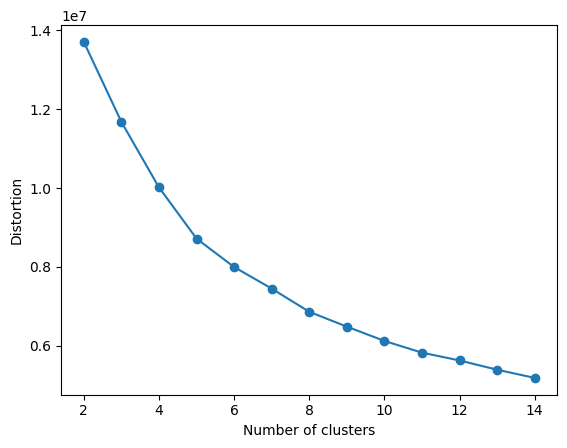

In [ ]:
#calcular a distorção para um intervalo de números de clusters
#objetivo = determinar número de clusters que usaremos

import matplotlib.pyplot as plt

distortions = []
for i in range(2, 15):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df2)
    distortions.append(km.inertia_)

# plot
plt.plot(range(2, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

silhuetas =[]
range_n_clusters = range(5,15)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    cluster_labels = clusterer.fit_predict(df2)

    silhouette_avg = silhouette_score(df2, cluster_labels)

    print(
        "Para n_clusters =",
        n_clusters,
        ", a média do silhouette_score é :",
        silhouette_avg,
    )

Para n_clusters = 5 , a média do silhouette_score é : 0.24595893890210538
Para n_clusters = 6 , a média do silhouette_score é : 0.2282117112413193
Para n_clusters = 7 , a média do silhouette_score é : 0.23552529618572784
Para n_clusters = 8 , a média do silhouette_score é : 0.2395049004850194
Para n_clusters = 9 , a média do silhouette_score é : 0.2496305214523661
Para n_clusters = 10 , a média do silhouette_score é : 0.24468160003749148
Para n_clusters = 11 , a média do silhouette_score é : 0.24502980543621042
Para n_clusters = 12 , a média do silhouette_score é : 0.22883838106203713
Para n_clusters = 13 , a média do silhouette_score é : 0.23235775765485253
Para n_clusters = 14 , a média do silhouette_score é : 0.23719594604635902


In [ ]:
#Assim, pudemos provar que o melhor número de clusters é igual a 9,
#sendo os grupos formados pela seguinte quantidade de membros:

(unique, counts) = np.unique(y_km_x, return_counts=True)
for i in range(len(unique)):
  print ("Grupo ", unique[i], "\t", counts[i], "membros" )

Grupo  0 	 676 membros
Grupo  1 	 554 membros
Grupo  2 	 582 membros
Grupo  3 	 215 membros
Grupo  4 	 953 membros
Grupo  5 	 870 membros
Grupo  6 	 585 membros
Grupo  7 	 708 membros
Grupo  8 	 415 membros


In [ ]:
km_x.cluster_centers_

array([[  6.7020858 ,   6.9725    ,   3.57338757,   5.34227811,
          5.95943787,   3.59587278,   0.63273669,   6.0495858 ,
          5.24340237,   4.2637574 ,   7.26992604,  92.73668639,
          5.49662722],
       [ 37.03424188,  17.23787004,   8.66308664,   9.7450722 ,
         24.33642599,  36.8332852 ,   6.41765343,  41.40075812,
         12.56155235,   8.59431408,  12.30359206, 117.15162455,
          6.08444043],
       [ 12.80726804,  28.99434708,  34.70189003,  20.40113402,
         37.05730241,  10.00166667,   0.81838488,  25.46455326,
         15.53517182,  14.15817869,  31.64097938,  99.26975945,
          9.80104811],
       [ 13.44288372,  26.54511628,  14.45893023,  17.34269767,
         17.99469767,   5.31134884,   1.70655814,  16.37055814,
         10.93883721,  54.732     ,  23.58823256,  77.16744186,
          6.84311628],
       [ 24.17207765,  15.5083106 ,   8.12664218,  20.23647429,
         15.28398741,   8.71943337,   2.8506191 ,  13.37034627,
         23.

In [ ]:
cerveja_centroides = km_x.cluster_centers_.tolist()

for i in range(len(cerveja_centroides)):
  cervejamestre = [round(num,1) for num in cerveja_centroides[i]]
  print('Cerveja mestre do Grupo ', i , ':\t', cervejamestre)

Cerveja mestre do Grupo  0 :	 [6.7, 7.0, 3.6, 5.3, 6.0, 3.6, 0.6, 6.0, 5.2, 4.3, 7.3, 92.7, 5.5]
Cerveja mestre do Grupo  1 :	 [37.0, 17.2, 8.7, 9.7, 24.3, 36.8, 6.4, 41.4, 12.6, 8.6, 12.3, 117.2, 6.1]
Cerveja mestre do Grupo  2 :	 [12.8, 29.0, 34.7, 20.4, 37.1, 10.0, 0.8, 25.5, 15.5, 14.2, 31.6, 99.3, 9.8]
Cerveja mestre do Grupo  3 :	 [13.4, 26.5, 14.5, 17.3, 18.0, 5.3, 1.7, 16.4, 10.9, 54.7, 23.6, 77.2, 6.8]
Cerveja mestre do Grupo  4 :	 [24.2, 15.5, 8.1, 20.2, 15.3, 8.7, 2.9, 13.4, 23.9, 5.1, 19.2, 55.0, 5.7]
Cerveja mestre do Grupo  5 :	 [18.2, 27.1, 12.4, 24.4, 27.8, 6.6, 1.0, 13.2, 19.7, 10.1, 33.9, 15.0, 6.4]
Cerveja mestre do Grupo  6 :	 [15.9, 47.3, 12.3, 47.0, 26.7, 4.7, 1.2, 8.8, 20.2, 9.4, 42.3, 85.2, 7.3]
Cerveja mestre do Grupo  7 :	 [29.4, 21.4, 9.2, 45.5, 19.2, 17.0, 2.7, 31.3, 49.1, 6.8, 20.8, 43.7, 6.5]
Cerveja mestre do Grupo  8 :	 [5.7, 6.1, 2.7, 5.6, 5.9, 2.3, 0.3, 4.0, 5.2, 3.5, 7.3, 24.2, 6.7]


In [ ]:
perguntas = ['Astringency','Body','Alcahool','Bitter','Sweet','Sour','Salty',
             'Fruits','Hoppy','Spices','Malty','Style','ABV']
resposta = []

for i,pergunta in enumerate(perguntas):
  while True:
    r = float(input(f"Qual a nota para {pergunta} (0-100)? "))
    if 0<=r<=100:
      resposta.append(r)
      break
    else:
      print('Resposta inválida')

nr = np.ones((1,13))
nr[0,:] = resposta
resp = km_x.predict(nr)

print('Pertence ao grupo: ',resp)